## TEST DEL MODELO

Una vez el modelo ya esté entrenado, se procede a ponerlo a prueba con nuevas imágenes.

Carga de librerías necesarias.

In [11]:
#Se importa el almacenamiento Google Drive, ésto puede ser visible desde el menú de la izquierda
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [12]:
#Librerias
import os
import random
from skimage.io import imread
import cv2
from keras.preprocessing import image
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import pandas as pd

import keras
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline

Se cargan las imágenes para realizar el test.

In [13]:
#Carga de imagenes PREDICCION
imgT_path='/content/drive/MyDrive/Trabajos/Trabajo 3/Faces'
x_test=[]
testLabel=[]
for img in sorted(os.listdir(imgT_path)):
    Face=cv2.imread(imgT_path+'/'+img,-1)
    Face = image.img_to_array(Face)
    if Face.shape[0]==120:
      if 'sunglasses' in img:
        testLabel.append(1)
      else:
        testLabel.append(0)
  
      x_test.append(cv2.resize(Face, (171,213), interpolation = cv2.INTER_AREA).astype('float32'))
      
    
x_test=np.array(x_test)
print('Imágenes para validación:',x_test.shape[0])
print('Dimensiones: ',x_test.shape[1:])

testdata=list(zip(x_test,testLabel))
#valdata=pd.DataFrame({'Img':x_vad,'Glasses':valLabel})
testdata=pd.DataFrame(testdata,columns = ['Img', 'Glasses'])

#valdata['Glasses']=pd.Categorical(valdata['Glasses'])
testdata=testdata.sample(frac=1).reset_index(drop=True)
testdata

Imágenes para validación: 640
Dimensiones:  (213, 171)


,Img,Glasses
0,"[[76.0, 74.671875, 73.34375, 72.0, 72.0, 72.0,...",0
1,"[[73.0, 71.671875, 71.0, 71.0, 71.0, 70.34375,...",0
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
3,"[[87.0, 85.671875, 84.34375, 83.0, 82.00781, 8...",1
4,"[[58.0, 56.671875, 56.0, 56.0, 55.007812, 55.0...",0
...,...,...
635,"[[67.0, 67.0, 66.671875, 66.0, 66.0, 64.6875, ...",0
636,"[[96.0, 98.65625, 101.640625, 105.0, 107.97656...",1
637,"[[61.0, 61.0, 61.0, 61.0, 61.0, 61.65625, 62.0...",0
638,"[[0.0, 7.96875, 31.03125, 70.0, 66.03125, 57.4...",1


Se carga el modelo ya entrenado

In [14]:
#Carga del modelo entrenado
new_model = keras.models.load_model('/content/drive/MyDrive/Trabajos/Trabajo 3/Código_Python/modelo.h5')

Se pone a prueba el modelo con una sola imágen.

Real :- No Glasses


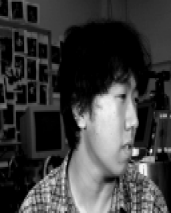

Predicted :-  No Glasses


In [15]:
#Prediccion de una sola imagen
y_predicted=new_model.predict(np.array(testdata['Img'][0:1].to_list(), dtype=np.float64))

output={0:'No Glasses',1:'Glasses'}
print("Real :-",output[testdata['Glasses'][0]])
cv2_imshow(x_test[0])
print("Predicted :- ",output[np.argmax(y_predicted)])

Y con todas las imágenes destinadas para el test y se imprime la matriz de confusión.

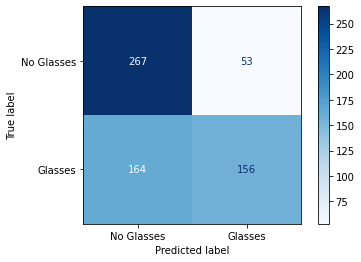

In [16]:
x_test=np.array(testdata['Img'].to_list(), dtype=np.float64)
y_test=testdata['Glasses']
pred=new_model.predict(x_test)
matrix = confusion_matrix(y_test, pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['No Glasses', 'Glasses'])

disp.plot(cmap=plt.cm.Blues)
plt.show()


Donde se obtiene que el modelo clasificó 267 de 320 fotos sin gafas correctamente, y 164 de 320 imágenes con gafas correctamente.